In [76]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

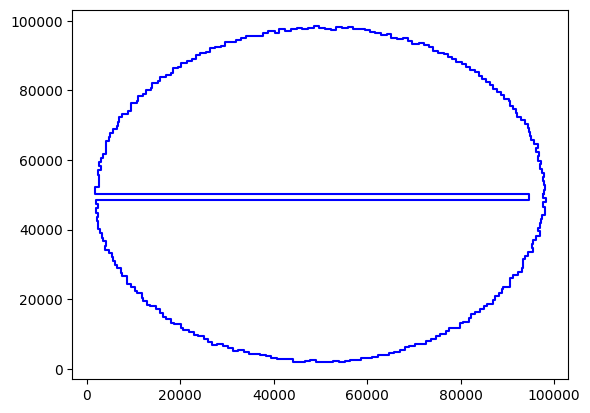

In [108]:
with open("day9input.txt", "r") as f:
    data = f.read().splitlines()
    data = [list(map(int, line.split(","))) for line in data]

x, y = zip(*data)
# plt.scatter(x, y)
plt.plot(x, y, 'b-')
# plt.xlim(80000, 100000)
# plt.ylim(40000, 60000)
plt.show()

{1725: 0, 1730: 1, 1968: 2, 2008: 3, 2190: 4, 2312: 5, 2361: 6, 2368: 7, 2429: 8, 2470: 9, 2508: 10, 2509: 11, 2540: 12, 2561: 13, 2749: 14, 2953: 15, 3005: 16, 3242: 17, 3512: 18, 3543: 19, 3937: 20, 4040: 21, 4059: 22, 4089: 23, 4117: 24, 4700: 25, 4732: 26, 4890: 27, 5478: 28, 5529: 29, 5674: 30, 5979: 31, 6437: 32, 6525: 33, 6733: 34, 6894: 35, 7395: 36, 7426: 37, 7520: 38, 8491: 39, 8597: 40, 8816: 41, 9511: 42, 9513: 43, 9545: 44, 10367: 45, 10704: 46, 10833: 47, 10923: 48, 11815: 49, 12001: 50, 12032: 51, 12580: 52, 12867: 53, 13525: 54, 13787: 55, 13965: 56, 14887: 57, 15321: 58, 15715: 59, 15730: 60, 16274: 61, 16916: 62, 16998: 63, 17967: 64, 18040: 65, 18417: 66, 18747: 67, 19605: 68, 20069: 69, 20259: 70, 20677: 71, 21537: 72, 21785: 73, 22584: 74, 22861: 75, 23259: 76, 23767: 77, 24252: 78, 25030: 79, 25525: 80, 25931: 81, 26282: 82, 26733: 83, 27492: 84, 27801: 85, 28741: 86, 29217: 87, 29528: 88, 30310: 89, 30882: 90, 31324: 91, 31966: 92, 32342: 93, 33004: 94, 33712: 95

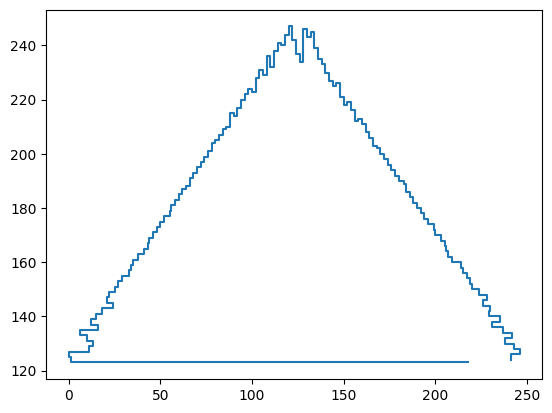

In [100]:
ssx = {j: i for i, j in enumerate(sorted(set(x)))}
sssx = {i: j for i, j in enumerate(sorted(set(x)))}
ssy = {j: i for i, j in enumerate(sorted(set(y)))}
sssy = {i: j for i, j in enumerate(sorted(set(y)))}
print(ssx)
print(ssy)
transformed = [[ssx[i], ssy[j]] for i, j in data[:249]]
plt.plot(*zip(*transformed))
plt.show()

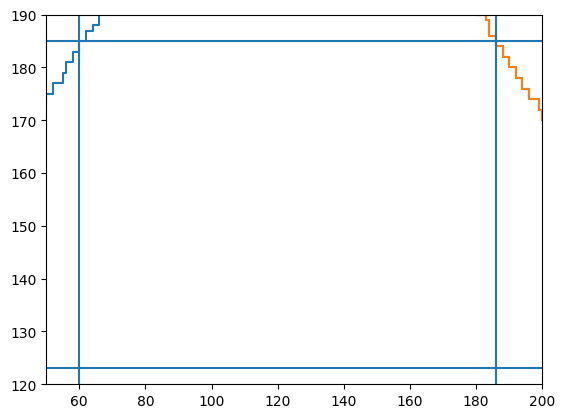

In [107]:
plt.plot(*zip(*transformed[:249]))
plt.plot(*zip(*transformed[:124]))
plt.xlim(50, 200)
plt.ylim(120, 190)
plt.axhline(185)
plt.axvline(60)
plt.axvline(186)
plt.show()

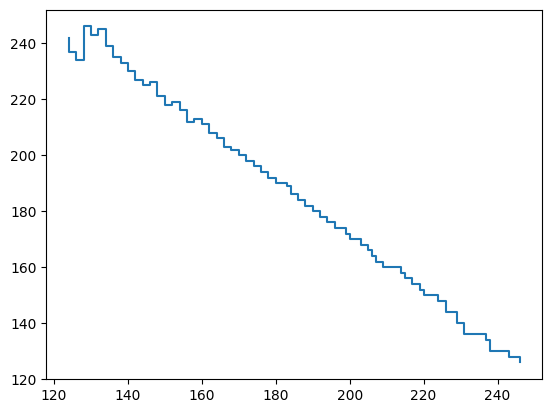

381


In [68]:
points1 = []
for i in range(3, 124):
    if transformed[i][1] == transformed[i - 1][1]:
        if transformed[i][0] < transformed[i - 1][0]:
            for x in range(max(transformed[i][0], transformed[i - 1][0]), min(transformed[i][0], transformed[i - 1][0]) - 1, -1):
                points1.append((x, transformed[i][1]))
        else:
            for x in range(min(transformed[i][0], transformed[i - 1][0]), max(transformed[i][0], transformed[i - 1][0]) + 1):
                points1.append((x, transformed[i][1]))
    else:
        for y in range(min(transformed[i][1], transformed[i - 1][1]), max(transformed[i][1], transformed[i - 1][1]) + 1):
            points1.append((transformed[i][0], y))

# len(points1)

remove = set()
for i in range(len(points1)):
    x, y = points1[i]
    if any(points1[j][0] == x - 1 and points1[j][1] < y for j in range(i)):
        remove.add(i)

points1 = [points1[i] for i in range(len(points1)) if i not in remove]
plt.plot(*zip(*points1))
plt.show()
print(len(points1))

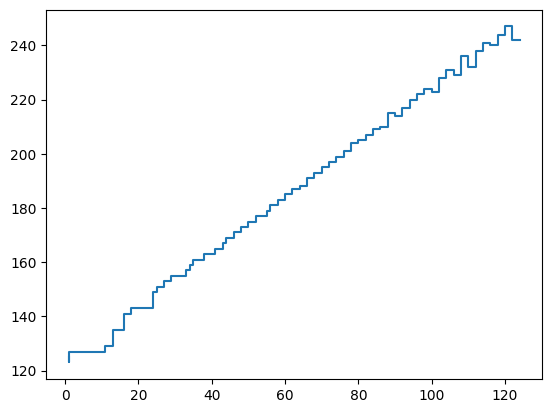

370


In [75]:
points2 = []
for i in range(124, 248):
    if transformed[i][1] == transformed[i - 1][1]:
        if transformed[i][0] < transformed[i - 1][0]:
            for x in range(max(transformed[i][0], transformed[i - 1][0]), min(transformed[i][0], transformed[i - 1][0]) - 1, -1):
                points2.append((x, transformed[i][1]))
        else:
            for x in range(min(transformed[i][0], transformed[i - 1][0]), max(transformed[i][0], transformed[i - 1][0]) + 1):
                points2.append((x, transformed[i][1]))
    else:
        for y in range(min(transformed[i][1], transformed[i - 1][1]), max(transformed[i][1], transformed[i - 1][1]) + 1):
            points2.append((transformed[i][0], y))

# len(points2)

remove = set()
for i in range(len(points2) // 2, len(points2)):
    x, y = points2[i]
    if any(points2[j][0] == x + 1 and points2[j][1] < y for j in range(len(points2))):
        remove.add(i)

points2 = [points2[i] for i in range(len(points2)) if i not in remove]
plt.plot(*zip(*points2))
plt.show()
print(len(points2))

In [106]:
BASELINE = 50238
top_points = points1 + points2
right_most = defaultdict(int)
last_y = -1
res = 0
for x, y in top_points:
    if y < last_y:
        del right_most[last_y]
    if y in right_most:
        res = max(res, -(sssx[x] - sssx[right_most[y]]) * (sssy[y] - BASELINE))
        if -(sssx[x] - sssx[right_most[y]]) * (sssy[y] - BASELINE) == 2319218629:
            print(x, y, right_most[y])
            print(sssx[x], sssy[y])
    else:
        right_most[y] = x
    last_y = y
res

60 185 186
15730 83905


2319218629

589438


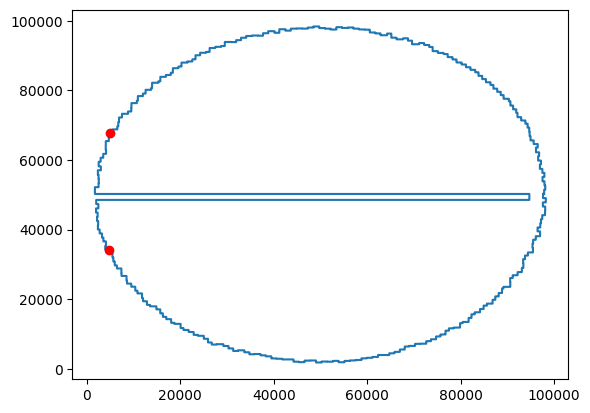

In [126]:
all_points = []
for i in range(1, len(data)):
    if data[i][1] == data[i - 1][1]:
        if data[i][0] < data[i - 1][0]:
            for x in range(max(data[i][0], data[i - 1][0]), min(data[i][0], data[i - 1][0]) - 1, -1):
                all_points.append((x, data[i][1]))
        else:
            for x in range(min(data[i][0], data[i - 1][0]), max(data[i][0], data[i - 1][0]) + 1):
                all_points.append((x, data[i][1]))
    else:
        for y in range(min(data[i][1], data[i - 1][1]), max(data[i][1], data[i - 1][1]) + 1):
            all_points.append((data[i][0], y))

print(len(all_points))

plt.plot(*zip(*all_points))
plt.plot(4890, 67739, 'ro')
plt.plot(4732, 34256, 'ro')
plt.show()

In [128]:
res = 0
for x, y in data[:249]:
    if not any(x < i < 94710 and 50238 < j < y for i, j in all_points):
        res = max(res, (94710 - x + 1) * (y - 50238 + 1))
        if (94710 - x + 1) * (y - 50238 + 1) == 1571939820:
            print(x, y)
print(res)

1572047142


In [125]:
res = 0
for x, y in data[249:]:
    if not any(x < i < 94710 and y < j < 48527 for i, j in all_points):
        res = max(res, (94710 - x) * (48527 - y))
        if (94710 - x) * (48527 - y) == 1284076038:
            print(x, y)
print(res)

4732 34256
1284076038


In [127]:
19605,86393
(94710 - 19605) * (86393 - 48527)

2843925930